In [1]:
"""

Name : Riya Hiwanj 

Project Title : Cryptocurrency Price Prediction with LSTM and GRU

"""

'\n\nName : Abhishek Nensing Pawar Roll No - 35  \nName : Riya Hiwanj Roll No - 14 \nName : Ajinkya Kshatriya Roll No - 19\n\n'

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import product
import statsmodels.api as sm

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

plt.style.use('seaborn-darkgrid')

In [ ]:
# https://finance.yahoo.com/quote/BTC-USD/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAFTGnAW5wnBtLPkcAlU9iJlZzvwA1jaZmJ8menataa1CCqBZHauHKXhJ-avIX3vlzNwNiCX__luFucAW1dza84t_2aymOQwQ96kBGr_h9atpxfq0XeSZtBHq-bqKHa8Z_t6Xivr1TJsKyAHXcPwFz4SSqV39SHxBHqGuKSeatOB5

# The dataset
root_path = '/content/BTC-USD 5 years Dec 2018-Dec2023.csv'

# btc_input_df = pd.read_csv(root_path, nrows=500)
btc_input_df = pd.read_csv(root_path)
btc_input_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1822,2023-11-27,37454.191406,37559.355469,36750.128906,37254.167969,37254.167969,19002925720
1823,2023-11-28,37247.992188,38368.480469,36891.089844,37831.085938,37831.085938,21696137014
1824,2023-11-29,37826.105469,38366.113281,37612.632813,37858.492188,37858.492188,20728546658
1825,2023-11-30,37861.117188,38141.753906,37531.140625,37712.746094,37712.746094,18115982627
1826,2023-12-01,37718.007813,38806.593750,37635.359375,38376.527344,38376.527344,20829622272


In [ ]:
btc_input_df.shape

(1827, 7)

In [ ]:
btc_input_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,23925.882486,24472.926496,23339.378608,23942.464853,23942.464853,2.872982e+10
std,16116.813383,16528.029488,15639.239065,16109.321241,16109.321241,1.836033e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,3.551764e+09
25%,9474.383789,9616.791992,9291.361817,9477.659668,9477.659668,1.676366e+10
50%,21028.238281,21478.089844,20566.484375,21085.876953,21085.876953,2.553448e+10
75%,35506.880860,36447.109375,34098.562500,35523.964844,35523.964844,3.616346e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
btc_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


In [ ]:
btc_input_df_datetype = btc_input_df.astype({'Date': 'datetime64'})

In [ ]:
btc_input_df_datetype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1827 non-null   datetime64[ns]
 1   Open       1827 non-null   float64       
 2   High       1827 non-null   float64       
 3   Low        1827 non-null   float64       
 4   Close      1827 non-null   float64       
 5   Adj Close  1827 non-null   float64       
 6   Volume     1827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 100.0 KB


In [ ]:
print('Null Values:',btc_input_df_datetype.isnull().values.sum())
print('If any NA values:', btc_input_df_datetype.isnull().values.any())

Null Values: 0
If any NA values: False


In [ ]:
btc_input_df_datetype.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1822,2023-11-27,37454.191406,37559.355469,36750.128906,37254.167969,37254.167969,19002925720
1823,2023-11-28,37247.992188,38368.480469,36891.089844,37831.085938,37831.085938,21696137014
1824,2023-11-29,37826.105469,38366.113281,37612.632813,37858.492188,37858.492188,20728546658
1825,2023-11-30,37861.117188,38141.753906,37531.140625,37712.746094,37712.746094,18115982627
1826,2023-12-01,37718.007813,38806.593750,37635.359375,38376.527344,38376.527344,20829622272


In [ ]:
btc_input_df_datetype.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-01,4024.464355,4309.377441,3969.710693,4214.671875,4214.671875,5375314093
1,2018-12-02,4200.733398,4301.519531,4110.978516,4139.877930,4139.877930,5262697895
2,2018-12-03,4147.323730,4155.979492,3840.446289,3894.130859,3894.130859,5089570994
3,2018-12-04,3886.294922,4075.627686,3832.750000,3956.893799,3956.893799,5028069239
4,2018-12-05,3958.894775,3969.535889,3753.994873,3753.994873,3753.994873,5302481574


<Axes: title={'center': 'Bitcoin Weighted Price'}, xlabel='Date'>

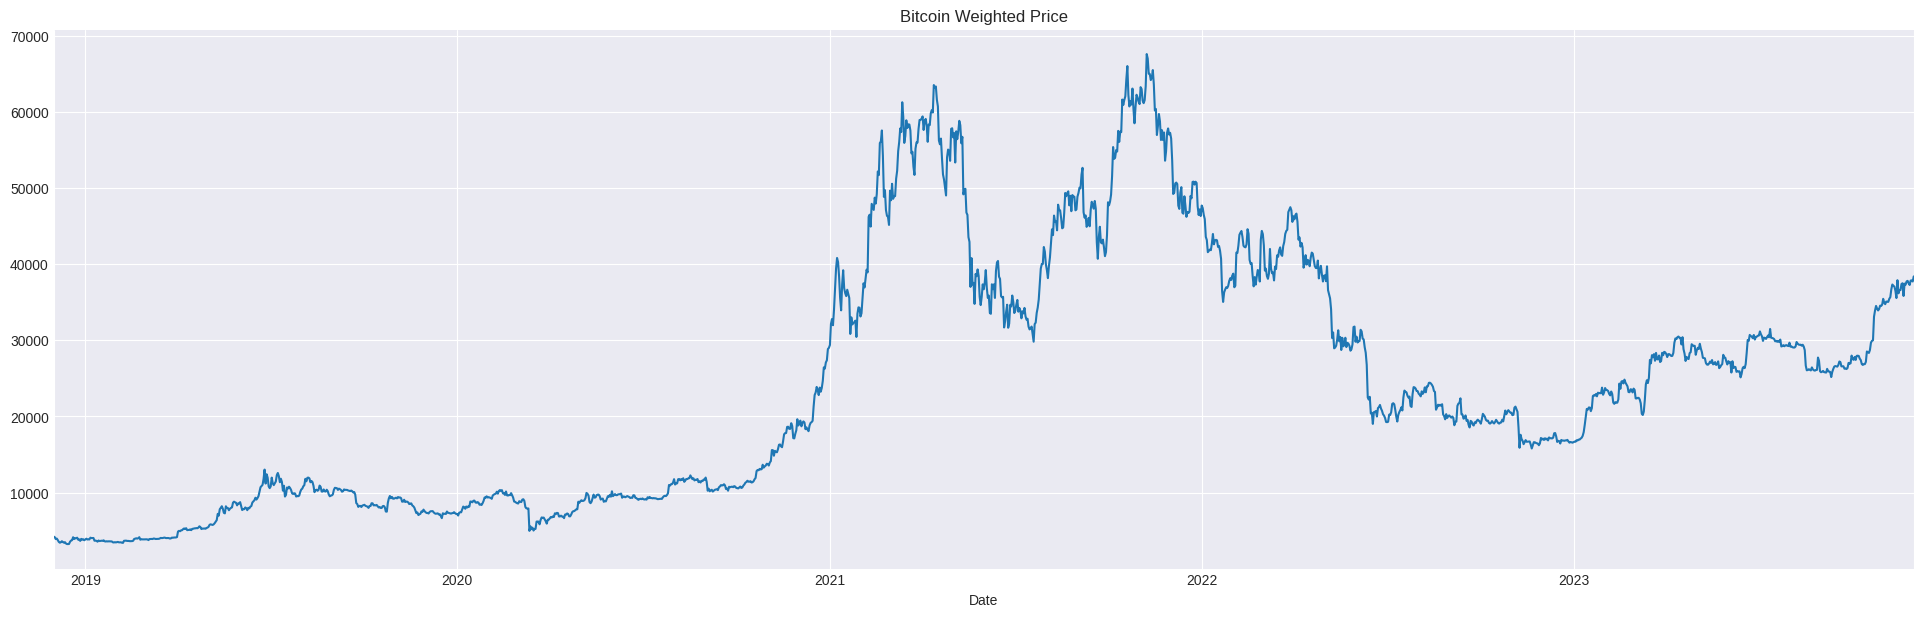

In [ ]:
btc_input_df_datetype.set_index("Date").Close.plot(figsize=(24,7), title="Bitcoin Weighted Price")

In [ ]:
btc_input_df_datetype['Date'] = pd.to_datetime(btc_input_df_datetype['Date'],unit='s').dt.date

display(btc_input_df_datetype.head())

group = btc_input_df_datetype.groupby('Date')

btc_closing_price_groupby_date = group['Close'].mean()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-01,4024.464355,4309.377441,3969.710693,4214.671875,4214.671875,5375314093
1,2018-12-02,4200.733398,4301.519531,4110.978516,4139.877930,4139.877930,5262697895
2,2018-12-03,4147.323730,4155.979492,3840.446289,3894.130859,3894.130859,5089570994
3,2018-12-04,3886.294922,4075.627686,3832.750000,3956.893799,3956.893799,5028069239
4,2018-12-05,3958.894775,3969.535889,3753.994873,3753.994873,3753.994873,5302481574


In [ ]:
display(btc_closing_price_groupby_date.head(10))

print("Length of btc_closing_price_groupby_date :", len(btc_closing_price_groupby_date))

Date
2018-12-01    4214.671875
2018-12-02    4139.877930
2018-12-03    3894.130859
2018-12-04    3956.893799
2018-12-05    3753.994873
2018-12-06    3521.101807
2018-12-07    3419.937256
2018-12-08    3476.114746
2018-12-09    3614.234375
2018-12-10    3502.656006
Name: Close, dtype: float64

Length of btc_closing_price_groupby_date : 1827


# Train Test Split

In [ ]:
prediction_days = 60

# Set Train data to be uplo ( Total data length - prediction_days )
df_train= btc_closing_price_groupby_date[:len(btc_closing_price_groupby_date)-prediction_days].values.reshape(-1,1)

# Set Test data to be the last prediction_days (or 60 days in this case)
df_test= btc_closing_price_groupby_date[len(btc_closing_price_groupby_date)-prediction_days:].values.reshape(-1,1)

In [ ]:
df_test.shape

(60, 1)

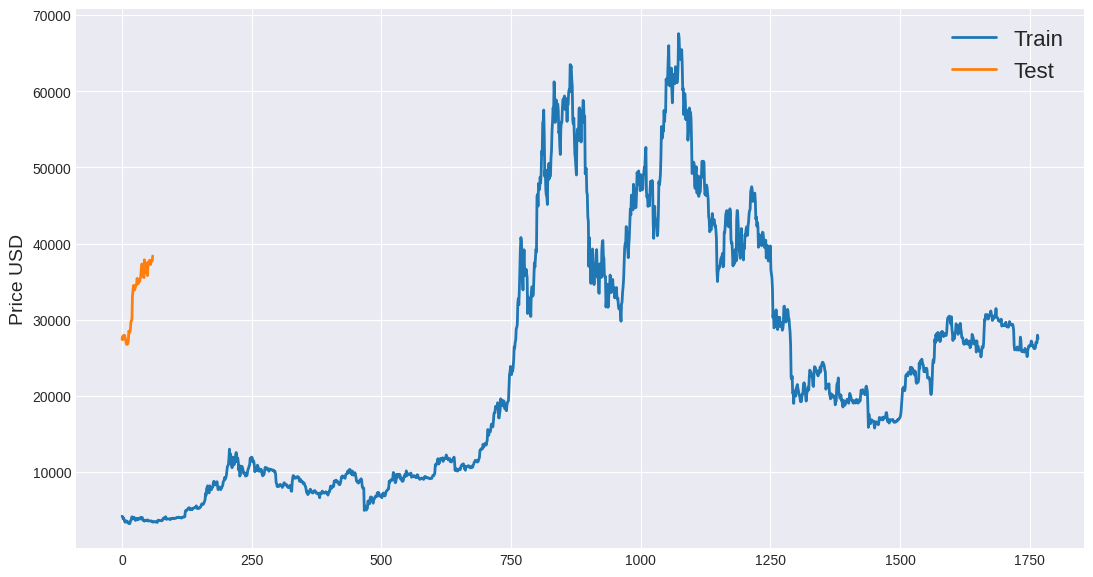

In [ ]:
chosen_col = 'Close'

fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(df_train, label='Train', linewidth=2)
ax.plot(df_test, label='Test', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [ ]:
# Min Max Scaling of Data post Train-Test Split
scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test)

In [ ]:
def dataset_generator_lstm(dataset, look_back=5):
    """
    Generates input-output pairs for an LSTM dataset.

    Args:
        dataset (numpy.ndarray): The dataset to generate input-output pairs from.
        look_back (int): The number of previous timesteps to use for prediction.

    Returns:
        numpy.ndarray: The input sequences.
        numpy.ndarray: The corresponding output values.
    """
    # A “lookback period” defines the window-size of how many
    # previous timesteps are used in order to predict
    # the subsequent timestep.
    dataX, dataY = [], []

    # Iterate over the dataset, considering a "look_back" window of previous timesteps
    for i in range(len(dataset) - look_back):
        window_size_x = dataset[i:(i + look_back), 0]
        dataX.append(window_size_x)
        dataY.append(dataset[i + look_back, 0]) # this is the label or actual y-value
    return np.array(dataX), np.array(dataY)

trainX, trainY = dataset_generator_lstm(scaled_train)

testX, testY = dataset_generator_lstm(scaled_test)

print("trainX: ", trainX.shape)
print("trainY: ", trainY.shape)
print("testX: ", testX.shape)
print("testY", testY.shape)

trainX:  (1762, 5)
trainY:  (1762,)
testX:  (55, 5)
testY (55,)


In [ ]:
print("trainX: ", trainX)
# print("trainY: ", trainY)
# print("testY: ", testX)
# print("testY", testY)

trainX:  [[0.01520145 0.01403879 0.01021869 0.01119433 0.0080403 ]
 [0.01403879 0.01021869 0.01119433 0.0080403  0.00442002]
 [0.01021869 0.01119433 0.0080403  0.00442002 0.00284743]
 ...
 [0.35849052 0.3572278  0.35933361 0.36973046 0.36802323]
 [0.3572278  0.35933361 0.36973046 0.36802323 0.36889678]
 [0.35933361 0.36973046 0.36802323 0.36889678 0.38468775]]


In [ ]:
print(trainX.shape)
print(testX.shape)

(1762, 5)
(55, 5)


### And now reshape trainX and testX

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1 ))

print("Shape of trainX: ", trainX.shape)
print("Shape of testX: ", testX.shape)

Shape of trainX:  (1762, 5, 1)
Shape of testX:  (55, 5, 1)


In [ ]:
# First checking the values for input_shape = (trainX.shape[1], trainX.shape[2])
# Note - `input_shape` of LSTM Model - `input_shape` is supposed to be (timesteps, n_features).

print("trainX.shape[1] - i.e. timesteps in input_shape = (timesteps, n_features) ", trainX.shape[1])
print("trainX.shape[2] - i.e. n_features in input_shape = (timesteps, n_features) ", trainX.shape[2])

trainX.shape[1] - i.e. timesteps in input_shape = (timesteps, n_features)  5
trainX.shape[2] - i.e. n_features in input_shape = (timesteps, n_features)  1


In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 128, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, input_shape = (trainX.shape[1], trainX.shape[2])))
# regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

regressor.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 128)            66560     
                                                                 
 dropout_4 (Dropout)         (None, 5, 128)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116033 (453.25 KB)
Trainable params: 116033 (453.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Compiling the LSTM
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

checkpoint_path = 'my_best_model.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')


earlystopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

callbacks = [checkpoint, earlystopping]
# callbacks = [checkpoint]


history = regressor.fit(trainX, trainY, batch_size = 32, epochs = 60, verbose=1, shuffle=False, validation_data=(testX, testY), callbacks=callbacks)

Epoch 1/60
56/56 [==============================] - ETA: 0s - loss: 0.0330
Epoch 1: val_loss improved from inf to 0.15320, saving model to my_best_model.hdf5
56/56 [==============================] - 6s 38ms/step - loss: 0.0330 - val_loss: 0.1532
Epoch 2/60
54/56 [===========================>..] - ETA: 0s - loss: 0.0408
Epoch 2: val_loss improved from 0.15320 to 0.06799, saving model to my_best_model.hdf5
56/56 [==============================] - 1s 15ms/step - loss: 0.0401 - val_loss: 0.0680
Epoch 3/60
53/56 [===========================>..] - ETA: 0s - loss: 0.0234
Epoch 3: val_loss improved from 0.06799 to 0.04000, saving model to my_best_model.hdf5
56/56 [==============================] - 1s 15ms/step - loss: 0.0226 - val_loss: 0.0400
Epoch 4/60
56/56 [==============================] - ETA: 0s - loss: 0.0093
Epoch 4: val_loss improved from 0.04000 to 0.02856, saving model to my_best_model.hdf5
56/56 [==============================] - 1s 16ms/step - loss: 0.0093 - val_loss: 0.0286
Epoc

## Plot line graph to show Loss Numbers relative to the epoch

In [ ]:
from tensorflow.keras.models import load_model

model_from_saved_checkpoint = load_model(checkpoint_path)

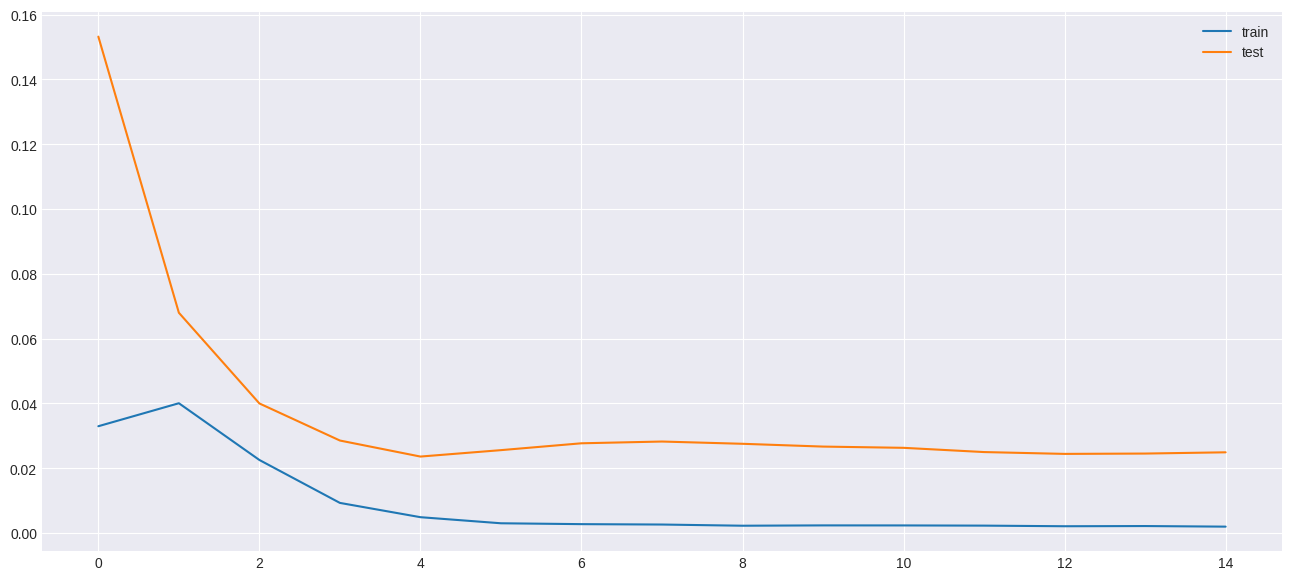

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# Transformation to original form and making the predictions
# LSTM Predictions using testX and plotting line graph against Actual testY
# predicted_btc_price_test_data = regressor.predict(testX)
predicted_btc_price_test_data = model_from_saved_checkpoint.predict(testX)

predicted_btc_price_test_data = scaler_test.inverse_transform(predicted_btc_price_test_data.reshape(-1, 1))

test_actual = scaler_test.inverse_transform(testY.reshape(-1, 1))

2/2 [==============================] - 1s 8ms/step


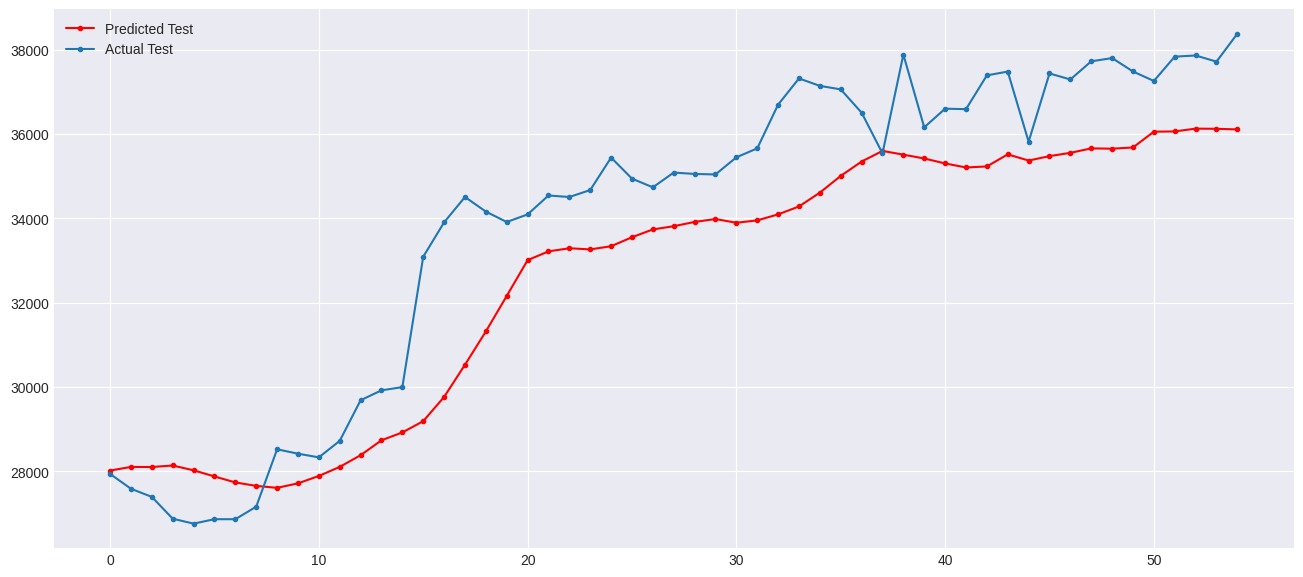

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(predicted_btc_price_test_data, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')

plt.legend()
plt.show()

<div style="background: linear-gradient(45deg, #FFC300, #FF5733, #C70039, #900C3F); padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h3 style="font-weight: bold; color: white; margin: 0 auto;"> LSTM Prediction using trainX and plotting line graph against Actual trainY </h3>
</div>

In [ ]:
# Transformation to original form and making the predictions

predicted_btc_price_train_data = model_from_saved_checkpoint.predict(trainX)

predicted_btc_price_train_data = scaler_train.inverse_transform(predicted_btc_price_train_data.reshape(-1, 1))

train_actual = scaler_train.inverse_transform(trainY.reshape(-1, 1))

56/56 [==============================] - 0s 5ms/step


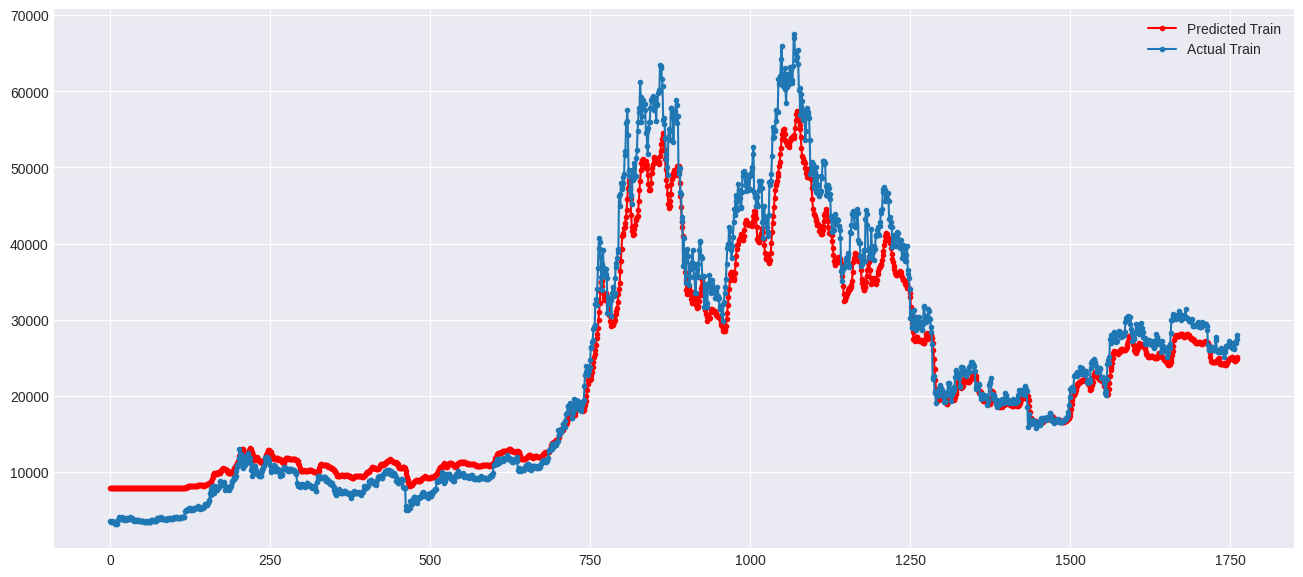

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(predicted_btc_price_train_data, 'r', marker='.', label='Predicted Train')

plt.plot(train_actual, marker='.', label='Actual Train')

plt.legend()
plt.show()

# RMSE - Test Data

In [ ]:
rmse_lstm_test = math.sqrt(mean_squared_error(test_actual, predicted_btc_price_test_data))

print('Test RMSE: %.3f' % rmse_lstm_test)

# With 2 Layers + Dropout + lookback=5 => I got - Test RMSE: 1666.162  => This seems best


Test RMSE: 1785.308


# RMSE - Train Data

In [ ]:
rmse_lstm_train = math.sqrt(mean_squared_error(train_actual, predicted_btc_price_train_data))

print('Test RMSE: %.3f' % rmse_lstm_train)

# With 2 Layers + Dropout + lookback=5 => I got - Test RMSE: 1047.916  => This seems best

Test RMSE: 3734.491


In [ ]:
#GRU

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense

regressor_gru = Sequential()

regressor_gru.add(GRU(units=128, activation='relu', return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
regressor_gru.add(Dropout(0.2))

# Adding a second GRU layer and some Dropout regularisation
regressor_gru.add(GRU(units=64, input_shape=(trainX.shape[1], trainX.shape[2])))
regressor_gru.add(Dropout(0.2))

# Adding the output layer
regressor_gru.add(Dense(units=1))

regressor_gru.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 5, 128)            50304     
                                                                 
 dropout_6 (Dropout)         (None, 5, 128)            0         
                                                                 
 gru_3 (GRU)                 (None, 64)                37248     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 87617 (342.25 KB)
Trainable params: 87617 (342.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Compiling the LSTM
regressor_gru.compile(optimizer = 'adam', loss = 'mean_squared_error')

checkpoint_path_GRU = 'my_best_model_GRU.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')


earlystopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

callbacks = [checkpoint, earlystopping]
# callbacks = [checkpoint]


history = regressor.fit(trainX, trainY, batch_size = 32, epochs = 60, verbose=1, shuffle=False, validation_data=(testX, testY), callbacks=callbacks)

Epoch 1/60
55/56 [============================>.] - ETA: 0s - loss: 0.0028
Epoch 1: val_loss improved from inf to 0.02075, saving model to my_best_model.hdf5
56/56 [==============================] - 1s 17ms/step - loss: 0.0028 - val_loss: 0.0208
Epoch 2/60
55/56 [============================>.] - ETA: 0s - loss: 0.0027
Epoch 2: val_loss did not improve from 0.02075
56/56 [==============================] - 1s 17ms/step - loss: 0.0027 - val_loss: 0.0211
Epoch 3/60
55/56 [============================>.] - ETA: 0s - loss: 0.0023
Epoch 3: val_loss did not improve from 0.02075
56/56 [==============================] - 1s 16ms/step - loss: 0.0023 - val_loss: 0.0209
Epoch 4/60
52/56 [==========================>...] - ETA: 0s - loss: 0.0024
Epoch 4: val_loss improved from 0.02075 to 0.01987, saving model to my_best_model.hdf5
56/56 [==============================] - 1s 15ms/step - loss: 0.0023 - val_loss: 0.0199
Epoch 5/60
54/56 [===========================>..] - ETA: 0s - loss: 0.0021
Epoch 5: 

In [ ]:
from tensorflow.keras.models import load_model

model_from_saved_checkpoint_GRU = load_model(checkpoint_path_GRU)

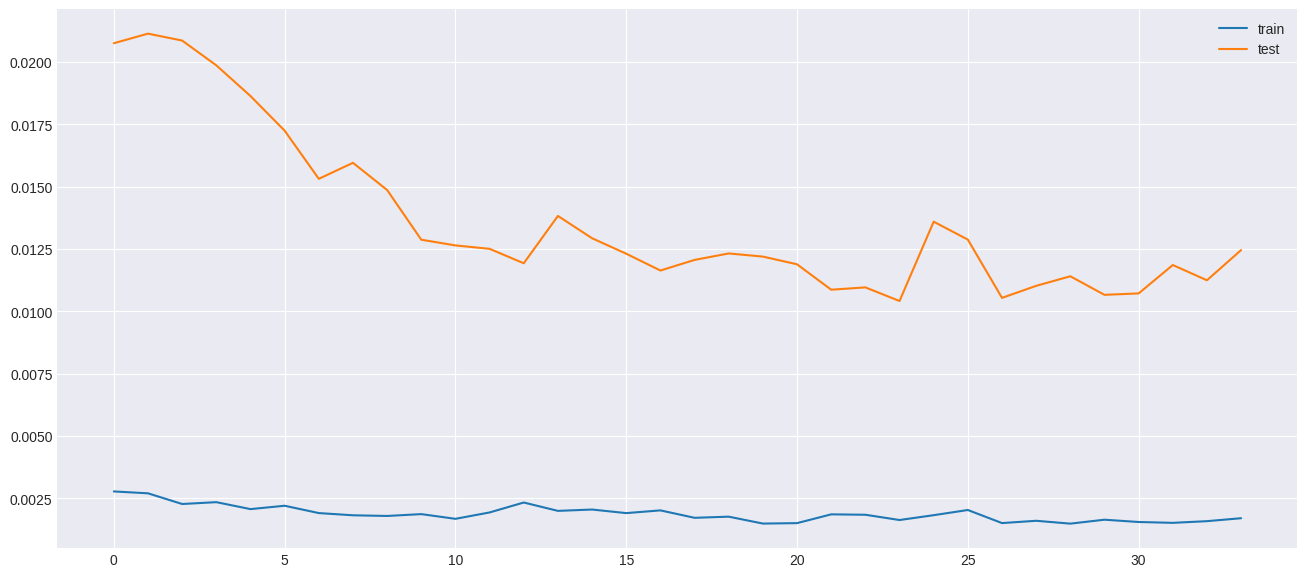

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# Transformation to original form and making the predictions
# LSTM Predictions using testX and plotting line graph against Actual testY
# predicted_btc_price_test_data = regressor.predict(testX)
predicted_btc_price_test_data = model_from_saved_checkpoint_GRU.predict(testX)

predicted_btc_price_test_data = scaler_test.inverse_transform(predicted_btc_price_test_data.reshape(-1, 1))

test_actual = scaler_test.inverse_transform(testY.reshape(-1, 1))

2/2 [==============================] - 1s 8ms/step


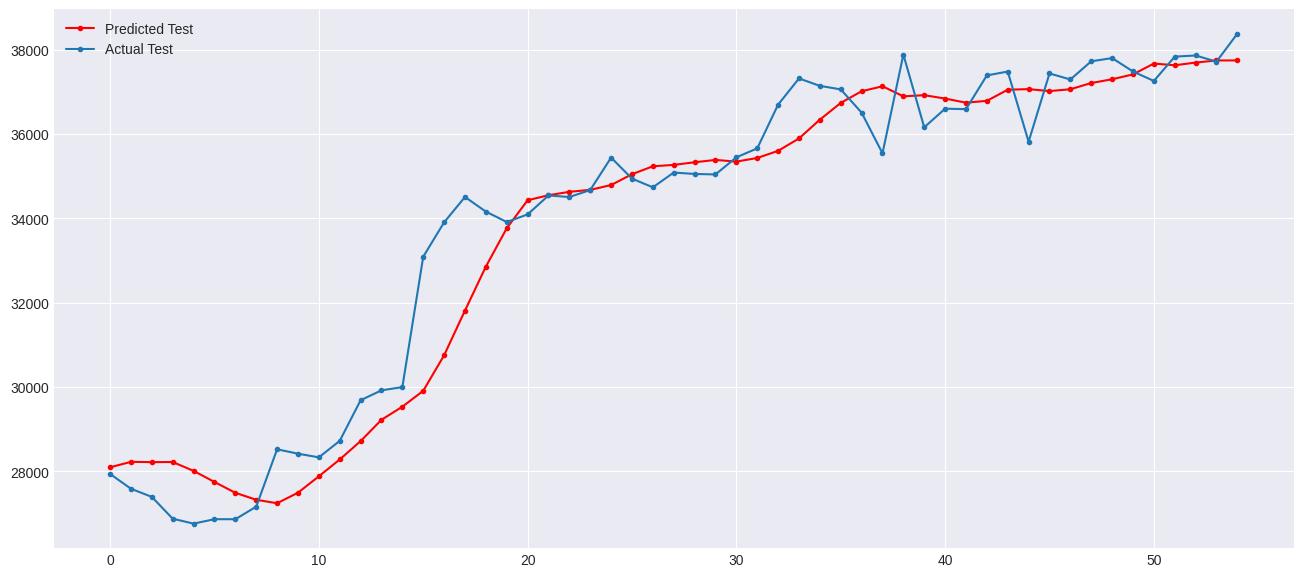

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(predicted_btc_price_test_data, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')

plt.legend()
plt.show()

In [ ]:
# Transformation to original form and making the predictions

predicted_btc_price_train_data = model_from_saved_checkpoint_GRU.predict(trainX)

predicted_btc_price_train_data = scaler_train.inverse_transform(predicted_btc_price_train_data.reshape(-1, 1))

train_actual = scaler_train.inverse_transform(trainY.reshape(-1, 1))

56/56 [==============================] - 0s 5ms/step


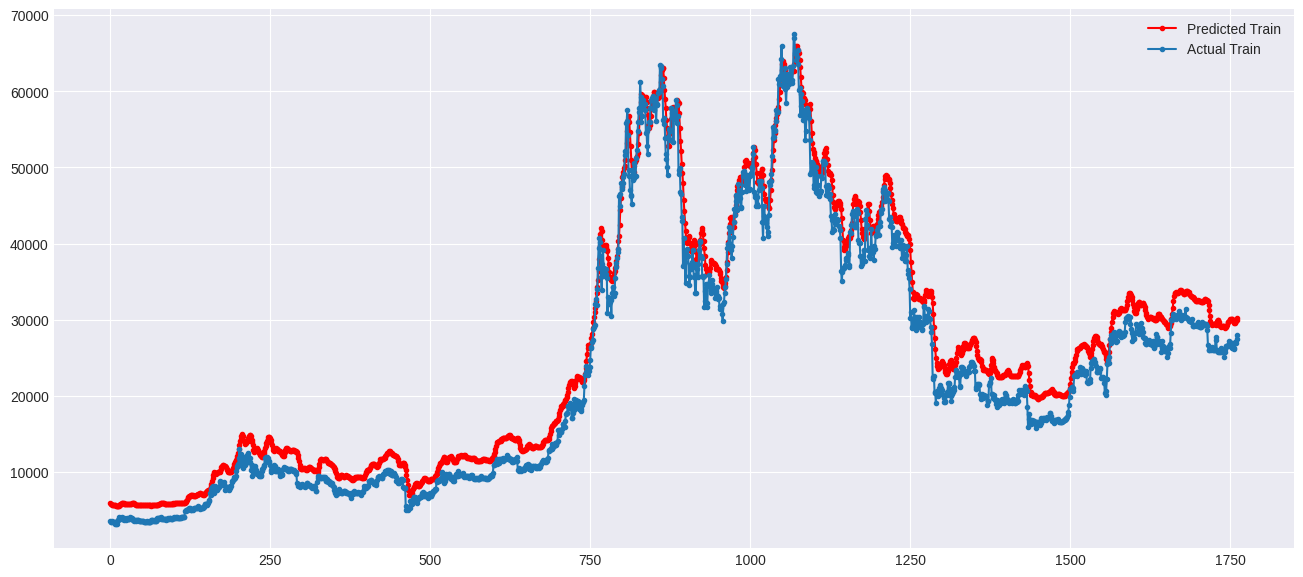

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(predicted_btc_price_train_data, 'r', marker='.', label='Predicted Train')

plt.plot(train_actual, marker='.', label='Actual Train')

plt.legend()
plt.show()

In [ ]:
rmse_lstm_test = math.sqrt(mean_squared_error(test_actual, predicted_btc_price_test_data))

print('Test RMSE: %.3f' % rmse_lstm_test)

# With 2 Layers + Dropout + lookback=5 => I got - Test RMSE: 1666.162  => This seems best


Test RMSE: 974.641


In [ ]:
rmse_lstm_train = math.sqrt(mean_squared_error(train_actual, predicted_btc_price_train_data))

print('Test RMSE: %.3f' % rmse_lstm_train)

# With 2 Layers + Dropout + lookback=5 => I got - Test RMSE: 1047.916  => This seems best

Test RMSE: 3011.658


In [ ]:
testX
testX.shape

(55, 5, 1)

In [ ]:
lookback_period = 5

# That is the original Trading data ended on 30-Oct-2021, but now I am going to forecast for Future 5 days beyond 30-Oct-2021

testX_last_5_days = testX[testX.shape[0] - lookback_period :  ]

testX_last_5_days.shape

(5, 5, 1)

In [ ]:
predicted_5_days_forecast_price_test_x = []

for i in range(5):
  predicted_forecast_price_test_x = model_from_saved_checkpoint.predict(testX_last_5_days[i:i+1])

  predicted_forecast_price_test_x = scaler_test.inverse_transform(predicted_forecast_price_test_x.reshape(-1, 1))
  # print(predicted_forecast_price_test_x)
  predicted_5_days_forecast_price_test_x.append(predicted_forecast_price_test_x)

print("Forecast for the next 5 Days Beyond the actual trading days ", np.array(predicted_5_days_forecast_price_test_x))
# That is the original Trading data ended on 30-Oct-2021, but now I am going to forecast beyond 30-Oct-2021

1/1 [==============================] - 0s 23ms/step
Forecast for the next 5 Days Beyond the actual trading days  [[[36051.598]]

 [[36057.816]]

 [[36123.566]]

 [[36120.055]]

 [[36104.9  ]]]


In [ ]:
predicted_5_days_forecast_price_test_x = np.array(predicted_5_days_forecast_price_test_x)

predicted_5_days_forecast_price_test_x.shape

(5, 1, 1)

In [ ]:
predicted_btc_price_test_data.shape
predicted_btc_price_test_data
predicted_5_days_forecast_price_test_x

array([[[36051.598]],

       [[36057.816]],

       [[36123.566]],

       [[36120.055]],

       [[36104.9  ]]], dtype=float32)

In [ ]:
predicted_5_days_forecast_price_test_x = predicted_5_days_forecast_price_test_x.flatten()

predicted_5_days_forecast_price_test_x


array([36051.598, 36057.816, 36123.566, 36120.055, 36104.9  ],
      dtype=float32)

array([28092.777, 28222.186, 28215.316, 28217.646, 28007.566, 27744.86 ,
       27487.83 , 27322.656, 27240.482, 27490.496, 27878.791, 28278.56 ,
       28713.451, 29219.457, 29530.387, 29906.2  , 30748.99 , 31810.244,
       32852.06 , 33761.086, 34425.227, 34544.535, 34625.285, 34671.938,
       34786.34 , 35042.902, 35230.613, 35264.285, 35326.344, 35381.883,
       35342.008, 35428.   , 35597.34 , 35890.68 , 36336.465, 36733.742,
       37010.133, 37128.59 , 36889.516, 36916.85 , 36837.168, 36739.062,
       36782.45 , 37046.992, 37060.688, 37014.1  , 37057.848, 37205.63 ,
       37294.445, 37410.035, 37667.383, 37625.992, 37690.3  , 37740.707,
       37740.82 ], dtype=float32)

In [ ]:
predicted_btc_test_concatenated = np.concatenate((predicted_btc_price_test_data, predicted_5_days_forecast_price_test_x))

predicted_btc_test_concatenated

predicted_btc_test_concatenated.shape

(60,)

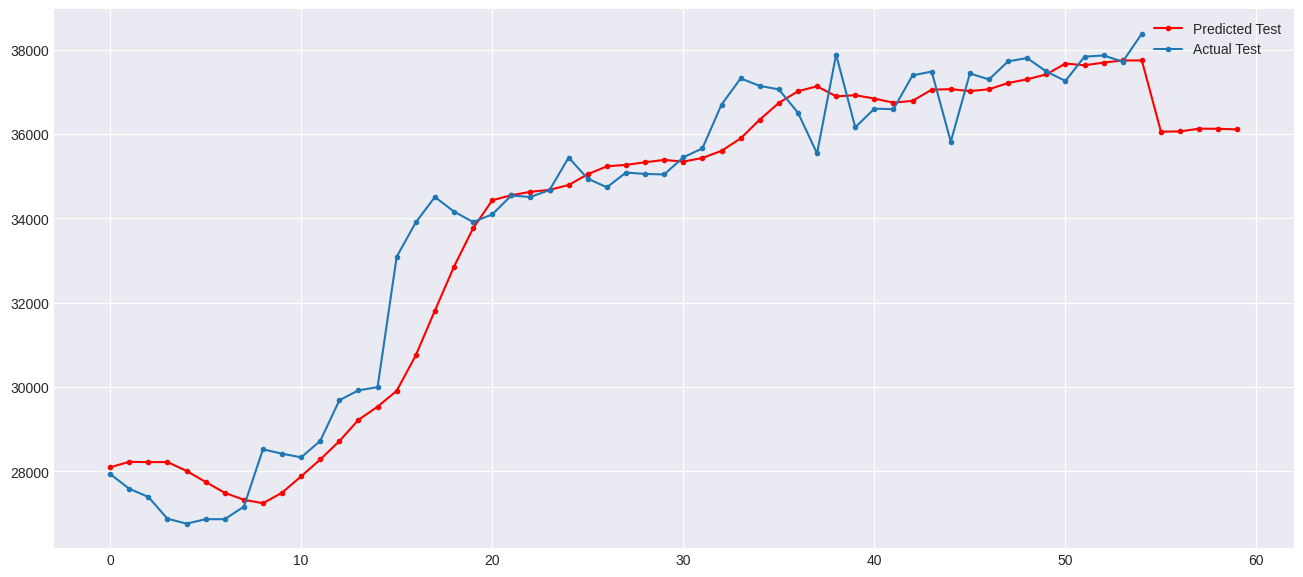

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(predicted_btc_test_concatenated, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')

plt.legend()

plt.show()